In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

## View data

In [2]:
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep="\t")

In [3]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


The sklearn's load_diabetes() dataset is using the same source in this example. The difference is load_diabetes() returns standardized data, while this example works from scratch.

#### Dataset feeatures
- age: age in years
- sex
- bmi: body mass index
- bp: average blood pressure
- s1: tc, T-Cells (a type of white blood cells)
- s2: ldl, low-density lipoproteins
- s3: hdl, high-density lipoproteins
- s4: tch, thyroid stimulating hormone
- s5: ltg, lamotrigine
- s6: glu, blood sugar level

#### Target (Y column)
As you can see from the full description below, the dataset aims to predict the quantitative measure of disease progression.

In [4]:
# View full description
for line in datasets.load_diabetes()['DESCR'].split('\n'):
    print(line)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Prepare data

Group the age according to range

In [5]:
age = df['AGE']
print(min(age), max(age))

19 79


Let's set the low limit to be 10 and upper limit 80 according to the min and max value of the data.

The labels are set according to the age group definition
[Source](https://help.healthycities.org/hc/en-us/articles/219556208-How-are-the-different-age-groups-defined-)

In [6]:
# Set the bins
bins = [10, 12, 17, 65, 80]
age_labels = ["children", "teens", "adults", "elderly"]

# perform range encoding
age = pd.cut(age, bins=bins, labels=age_labels, include_lowest=True)
age = pd.DataFrame(age)

In [7]:
age.head()

,AGE
0,adults
1,adults
2,elderly
3,adults
4,adults


### One-hot encoding

After grouping the age data, we can do one-hot encoding. Let's also encode the gender column

In [8]:
age = pd.get_dummies(age)
# use rename() to change the new column name
gender = pd.get_dummies(df["SEX"]).rename(columns=
                                          {1:"gender1", 2:"gender2"})

gender.head()

,gender1,gender2
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


### Normalize data

In [9]:
scaler = preprocessing.MinMaxScaler()
df_to_scale = df.drop(["AGE", "SEX"],axis=1)
df_scaled = scaler.fit_transform(df_to_scale)

column_names = ["BMI","BP","S1","S2","S3","S4","S5","S6","Y"]
df_scaled = pd.DataFrame(df_scaled, columns=column_names)

In [10]:
df_scaled.head()

,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679


### Combine all data

In [11]:
df = pd.concat([age, gender, df_scaled], axis=1)

In [12]:
df.head()

,AGE_children,AGE_teens,AGE_adults,AGE_elderly,gender1,gender2,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0,0,1,0,0,1,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0,0,1,0,1,0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0,0,0,1,0,1,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0,0,1,0,1,0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0,0,1,0,1,0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679


## Summary of Data Preparation
- Change continuous variable to ordinal variable

We convert age into age groups and give them labels

- One-hot encoding

Both age and gender are converted to one-hot encoding. 

- Normalize data

Other data are scaled using the sklearn min-max algorithm which normalizes according to the minimum and maximum data

Now, the data is ready for training

In [13]:
# Split data and target
data = df.drop(["Y"], axis=1)
target = df["Y"]

In [14]:
data = data.astype(dtype=np.float32)
target = target.astype(dtype=np.float32)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=123)

## Train model

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(model.coef_)

[ 0.0000000e+00  5.9604645e-08  9.7855646e-03 -9.7855041e-03
  3.8415663e-02 -3.8415335e-02  4.3625614e-01  2.1792671e-01
 -7.4969321e-01  4.7158659e-01  1.4547983e-01  2.4532266e-01
  5.5998003e-01  8.9573458e-02]


In [19]:
print(model.intercept_)

-0.14002776


## Evaluate

In [20]:
predictions=model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

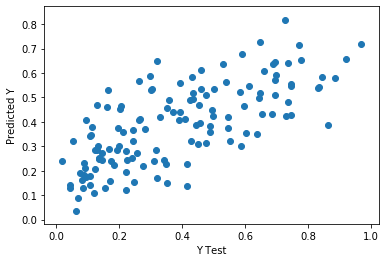

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1397266
MSE: 0.028596623
RMSE: 0.16910537


The metrics score is low which indicates that the error value is low. The model generalize the data well